<h1 style="font-size:36px;">Multilayer Perceptron</h1>

MLP is a deep learning method that aims to learn complex relationships between data by using artificial neural network structure. The MLP model for Bitcoin price prediction attempts to predict future prices using historical price data. The model has a network structure consisting of many hidden layers, and nodes in each layer generate an output using inputs from all nodes in the previous layer. The accuracy of the model depends on many factors such as the learning rate, parameter settings, and the features used.

MLP, yapay sinir ağı yapısını kullanarak, veriler arasındaki kompleks ilişkileri öğrenmeyi amaçlayan bir derin öğrenme yöntemidir. Bitcoin fiyat tahmini yapmak için kullanılan MLP modeli, tarihsel fiyat verilerini kullanarak gelecekteki fiyatları tahmin etmeye çalışır. Model, birçok gizli katmandan oluşan bir ağ yapısına sahiptir ve her katmandaki düğümler, önceki katmandaki tüm düğümlerden gelen girdileri kullanarak bir çıkış üretir. Modelin doğruluğu, öğrenme oranı, parametre ayarları ve kullanılan özellikler gibi birçok faktöre bağlıdır.

<h1 style="font-size:15px;">Summary of the Model</h1>


Optimizer: Adam 
Learning rate: 0.001
Loss: Mse
Metrics: Accuracy

In [26]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


This model includes two dense layers. The first layer has 100 output neurons. The second layer has only one output neuron. The total number of parameters is 4201 and the number of trainable parameters is also 4201. This model can be used for regression problems and the output of the model is a number.

Bu model, iki adet yoğun katman içerir. İlk katman,  100 adet çıktı nöronuna sahiptir. İkinci katman,  sadece bir adet çıktı nöronuna sahiptir. Toplam parametre sayısı 4201'dir ve eğitilebilir parametre sayısı da 4201'dir. Bu model, regresyon problemleri için kullanılabilir ve modelin çıkışı bir sayıdır.

<h1 style="font-size:15px;">Model Outputs</h1>

In [87]:
print(MLP_ERROR)

         MSE        RMSE         MAE       R2
2.715959e+06 1648.016588 1460.566791 0.842159



<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,optimizers,callbacks
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('btcusd.csv',usecols=['Open','High','Low','Close','Date'])
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date',inplace=True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3150 entries, 2014-09-17 to 2023-05-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3150 non-null   float64
 1   High    3150 non-null   float64
 2   Low     3150 non-null   float64
 3   Close   3150 non-null   float64
dtypes: float64(4)
memory usage: 123.0 KB
None


,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719
2023-04-29,29336.566406,29452.455078,29088.042969,29248.488281
2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641


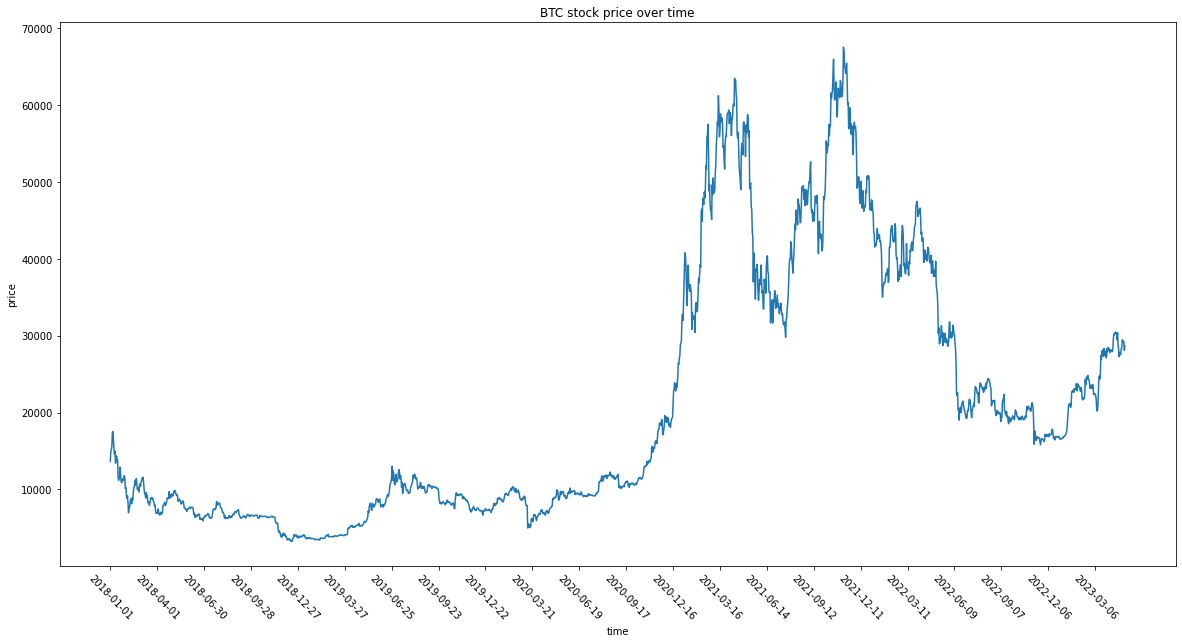

In [16]:
plt.figure(figsize=(20,10))
df = df['2018':]
plt.plot(df.index, df["Close"])
plt.xticks(df[::90].index, df[::90].index.date,rotation = -46)
plt.title("BTC stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [9]:
train_data, test_data = train_test_split(df,random_state=42,test_size=0.2,shuffle=False) 
window_size = 40
X_train, y_train = split_sequence(train_data["Close"].values, window_size)
X_test, y_test = split_sequence(test_data["Close"].values, window_size)

# MLP Model

In [10]:
network = models.Sequential([
  layers.Dense(100, activation='relu', input_dim=window_size),  
  layers.Dense(1)
])
# network.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #loss='mse
network.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['accuracy']) 
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
cb = callbacks.TensorBoard()
trained_network=network.fit(X_train, y_train, epochs=200, batch_size=64,verbose=1,callbacks=[cb],validation_split=0.16,shuffle=False)

Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 22021210.0000 - accuracy: 0.0000e+00 - val_loss: 49764456.0000 - val_accuracy: 0.0000e+00
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 112852096.0000 - accuracy: 0.0000e+00 - val_loss: 23671846.0000 - val_accuracy: 0.0000e+00
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 378292448.0000 - accuracy: 0.0000e+00 - val_loss: 825336896.0000 - val_accuracy: 0.0000e+00
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 222949360.0000 - accuracy: 0.0000e+00 - val_loss: 716477184.0000 - val_accuracy: 0.0000e+00
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 30668226.0000 - accuracy: 0.0000e+00 - val_loss: 121144304.0000 - val_accuracy: 0.0000e+00
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 8567867.0000 - accuracy: 0.0000e+00 - val_loss: 20836352.0000 - val_accuracy: 0.0000e+00
Epoch 7/200
20/20

20/20 [==============================] - 0s 2ms/step - loss: 4332031.5000 - accuracy: 0.0000e+00 - val_loss: 12513065.0000 - val_accuracy: 0.0000e+00
Epoch 102/200
20/20 [==============================] - 0s 1ms/step - loss: 4289625.5000 - accuracy: 0.0000e+00 - val_loss: 12386866.0000 - val_accuracy: 0.0000e+00
Epoch 103/200
20/20 [==============================] - 0s 2ms/step - loss: 4247906.0000 - accuracy: 0.0000e+00 - val_loss: 12263372.0000 - val_accuracy: 0.0000e+00
Epoch 104/200
20/20 [==============================] - 0s 2ms/step - loss: 4206881.5000 - accuracy: 0.0000e+00 - val_loss: 12142475.0000 - val_accuracy: 0.0000e+00
Epoch 105/200
20/20 [==============================] - 0s 2ms/step - loss: 4166543.2500 - accuracy: 0.0000e+00 - val_loss: 12024182.0000 - val_accuracy: 0.0000e+00
Epoch 106/200
20/20 [==============================] - 0s 1ms/step - loss: 4126882.2500 - accuracy: 0.0000e+00 - val_loss: 11908459.0000 - val_accuracy: 0.0000e+00
Epoch 107/200
20/20 [=========

In [22]:
y_predicted = network.predict(X_test, verbose=1)
result = test_data.iloc[window_size:]
result['Predicted'] = y_predicted
result[['Close','Predicted']]

11/11 [==============================] - 0s 522us/step


<ipython-input-22-f75e88b767c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Predicted'] = y_predicted


,Close,Predicted
Date,,
2022-05-18,28720.271484,30631.205078
2022-05-19,30314.333984,30214.458984
2022-05-20,29200.740234,29949.500000
2022-05-21,29432.226563,29773.441406
2022-05-22,30323.722656,29748.394531
...,...,...
2023-04-28,29340.261719,28526.552734
2023-04-29,29248.488281,28627.222656
2023-04-30,29268.806641,28960.777344


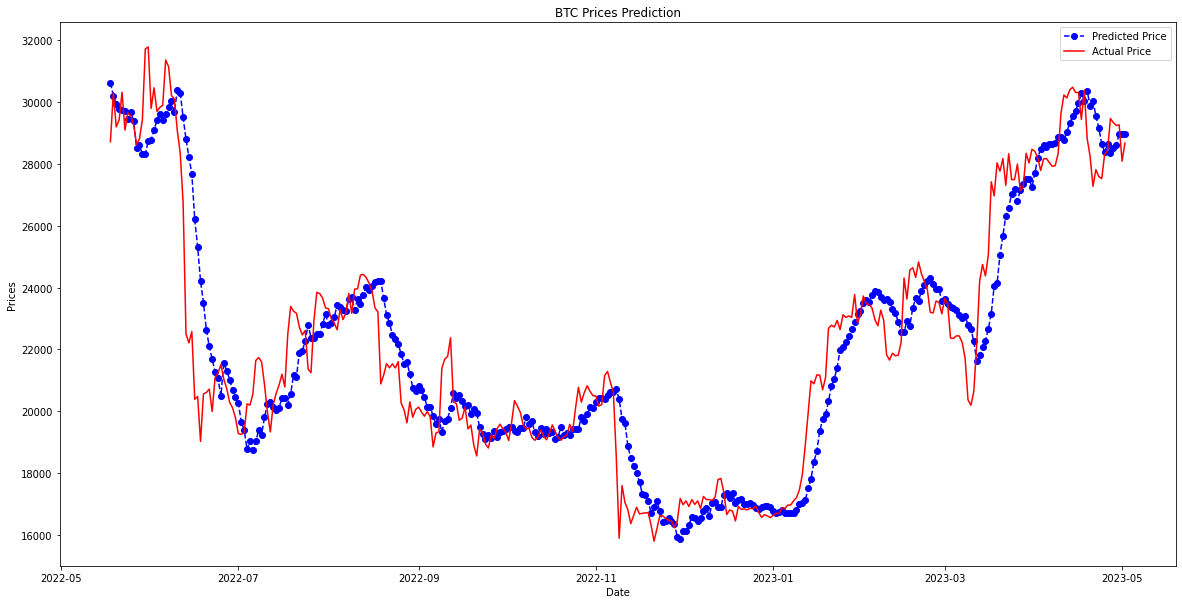

In [23]:
test_set_range = result.index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, result['Predicted'], color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, result['Close'], color='red', label='Actual Price')
plt.title('BTC Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(result['Close'], result['Predicted'])
RMSE = mean_squared_error(result['Close'], result['Predicted'], squared=False)
MAE = mean_absolute_error(result['Close'], result['Predicted'])
R2 = r2_score(result['Close'], result['Predicted'])



In [25]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
MLP_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
MLP_ERROR = MLP_ERROR.to_string(index=False)

# ERROR'u yazdır

print(MLP_ERROR)

         MSE        RMSE        MAE       R2
1.940996e+06 1393.196181 956.587394 0.887197
